# 스팸 메일 분류하기

    kaggle에서 제공하는 데이터를 가지고 스팸 메일 분류기 구현.
    
    데이터 : https://www.kaggle.com/uciml/sms-spam-collection-dataset

## 1. 데이터 처리

In [1]:
import pandas as pd

df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Unnamed 열 삭제 및 v1 0,1 로 맵핑

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)
df['v1'] = df['v1'].replace(['ham','spam'],[0,1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [4]:
print(df.isnull().sum())
print(len(df))
print(df.nunique())

v1    0
v2    0
dtype: int64
5572
v1       2
v2    5169
dtype: int64


In [5]:
# 중복 제거

df.drop_duplicates(['v2'],inplace=True)
print(len(df))

5169


v1
0    4516
1     653
dtype: int64


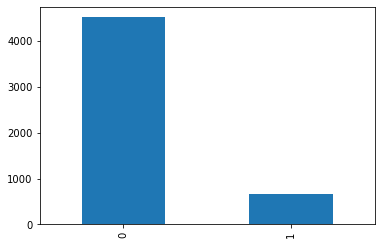

In [6]:
import matplotlib.pyplot as plt

df['v1'].value_counts().plot(kind='bar')
print(df.groupby('v1').size())

In [7]:
# X, y 분리

X_data = df['v2']
y_data = df['v1']

# Tokenize 

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
seq = tokenizer.texts_to_sequences(X_data)
print(seq[:5])

[[47, 433, 4011, 779, 705, 662, 64, 8, 1201, 94, 121, 434, 1202, 142, 2710, 1203, 68, 57, 4012, 137], [49, 306, 1363, 435, 6, 1766], [53, 537, 8, 20, 4, 1016, 933, 2, 221, 2711, 1364, 706, 2712, 2713, 267, 2714, 70, 2711, 2, 2715, 2, 359, 537, 604, 1204, 82, 436, 186, 707, 437, 4013], [6, 227, 152, 23, 347, 2716, 6, 138, 145, 56, 152], [934, 1, 97, 96, 69, 453, 2, 876, 69, 1767, 199, 105, 438]]


In [8]:
print(tokenizer.word_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'come': 59, 'am': 60, 'was': 61, 'time': 62, 'its': 63, 'only': 64, 'day': 65, 'want': 66, 'love': 67, 'there': 68, 'he': 69, 'text': 70, 'send': 71, 'going': 72, 'one': 73, 'need': 74, 'by': 75, 'lor': 76, 'home': 77, 'as': 78, 'about': 79, 'still': 80, 'see': 81, 'txt': 82, 'back': 83, 'r': 84, 'stop': 85, 'da': 86, 'k': 87, 'today': 88, 'our': 89, "i'll": 90, 'dont': 91, 'reply': 

In [9]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab size : ",vocab_size)

vocab size :  8917


max len :  189
mean len : 15.610369510543626


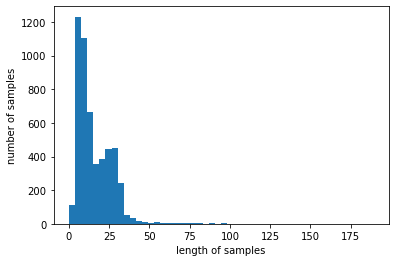

In [10]:
# sequence 데이터 확인

X_data = seq
maxLen = max(len(word) for word in X_data)
meanLen = (sum(map(len,X_data)))/len(X_data)
print("max len : ",maxLen)
print("mean len :",meanLen)

plt.hist([len(word) for word in X_data],bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples");

In [11]:
# 전체 데이터를 최대 길이인 189 로 패딩

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_data = pad_sequences(X_data,maxlen=maxLen)
print("X_data shape : ",X_data.shape)

X_data shape :  (5169, 189)


In [12]:
# split train/test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, 
                                                    random_state=42)
print("train size : ",len(X_train))
print("test size : ",len(X_test))

train size :  4135
test size :  1034


## 스팸 분류 구현

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense

model = Sequential()
model.add(Embedding(vocab_size,32))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train,y_train,epochs=7,batch_size=64,validation_split=0.2)

Epoch 1/7
52/52 [==============================] - 2s 34ms/step - loss: 0.5049 - acc: 0.7576 - val_loss: 0.2040 - val_acc: 0.9746
Epoch 2/7
52/52 [==============================] - 1s 29ms/step - loss: 0.1444 - acc: 0.9690 - val_loss: 0.0848 - val_acc: 0.9819
Epoch 3/7
52/52 [==============================] - 1s 28ms/step - loss: 0.0757 - acc: 0.9804 - val_loss: 0.0611 - val_acc: 0.9807
Epoch 4/7
52/52 [==============================] - 2s 29ms/step - loss: 0.0447 - acc: 0.9868 - val_loss: 0.0430 - val_acc: 0.9891
Epoch 5/7
52/52 [==============================] - 2s 31ms/step - loss: 0.0269 - acc: 0.9931 - val_loss: 0.1869 - val_acc: 0.9238
Epoch 6/7
52/52 [==============================] - 2s 31ms/step - loss: 0.0727 - acc: 0.9791 - val_loss: 0.0639 - val_acc: 0.9831
Epoch 7/7
52/52 [==============================] - 2s 34ms/step - loss: 0.0131 - acc: 0.9968 - val_loss: 0.0562 - val_acc: 0.9867


In [14]:
print("accuracy : ",model.evaluate(X_test,y_test)[1])

33/33 [==============================] - 0s 7ms/step - loss: 0.0631 - acc: 0.9816
accuracy :  0.9816247820854187


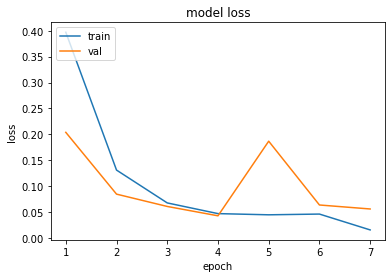

In [15]:
# 훈련 데이터와 검증 데이터에 대해서 정확도 시각화

epochs = range(1,8)

plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

    실습 데이터의 양이 적어 과적합이 빠르게 시작된다. 
    -> 검증 데이터에 대한 오차가 증가하기 시작되는 시점의 바로 직전인 3~5 에포크 정도가 적당하다.